In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import normalize
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train[0])
# print(X_test, y_test)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [11]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [12]:
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [13]:
X_train = normalize(X_train)
X_test = normalize(X_test)
print(X_train[0])
print(X_train.shape, X_test.shape)

[[[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [

In [26]:
print(y_train.shape, y_test.shape)
y_train = to_categorical(y_train)
print(y_train.shape)
y_test = to_categorical(y_test)
print(y_test.shape)

(60000,) (10000,)
(60000, 10)
(10000, 10)


In [27]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [28]:
classes_count = y_test.shape[1]
print(classes_count)

10


In [30]:
def recognition_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=6, input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, kernel_size=6, input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(classes_count, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [31]:
model = recognition_model()
model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=200, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 30s 617us/sample - loss: 0.3927 - acc: 0.8836 - val_loss: 0.1372 - val_acc: 0.9603
Epoch 2/5
48000/48000 [==============================] - 27s 555us/sample - loss: 0.1185 - acc: 0.9640 - val_loss: 0.0867 - val_acc: 0.9732
Epoch 3/5
48000/48000 [==============================] - 27s 556us/sample - loss: 0.0823 - acc: 0.9743 - val_loss: 0.0652 - val_acc: 0.9807
Epoch 4/5
48000/48000 [==============================] - 27s 557us/sample - loss: 0.0671 - acc: 0.9789 - val_loss: 0.0582 - val_acc: 0.9823
Epoch 5/5
48000/48000 [==============================] - 27s 563us/sample - loss: 0.0570 - acc: 0.9816 - val_loss: 0.0559 - val_acc: 0.9825


In [32]:
print(model.metrics_names)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(test_loss, test_acc)

['loss', 'acc']
10000/10000 [==============================] - 3s 328us/sample - loss: 0.0499 - acc: 0.9847
0.04994717808961868 0.9847


# Testing the model

[4] 4


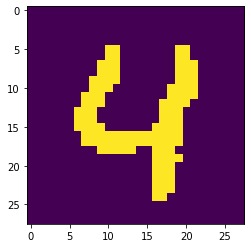

In [35]:
test_observation = X_test[4]
test_observation = test_observation.reshape(1, test_observation.shape[0], test_observation.shape[1], 1)
prediction = model.predict_classes(test_observation)
print(prediction, np.argmax(y_test[4]))

plt.imshow(X_test[4])

In [36]:
model.save('digit_recognition_model.h5')

In [19]:
#Hyperparameter Tuning

def recognition_model(activation='relu', kernel_size=4, pool_size=2, optimizer='Adam'):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=kernel_size, input_shape=(28,28,1), activation=activation))
    model.add(MaxPooling2D(pool_size=pool_size, padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, kernel_size=kernel_size, input_shape=(28,28,1), activation=activation))
    model.add(MaxPooling2D(pool_size=pool_size, padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation=activation))
    model.add(Dense(classes_count, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

batch_size = 200
epochs = 5
model_cv = KerasClassifier(build_fn=recognition_model, batch_size=batch_size, epochs=epochs, verbose=1)


activation = ['relu', 'sigmoid']
optimizer = ['Adam', 'Adamax']
kernel_size = [4, 6]
pool_size = [2, 4]
param_grid=dict(activation=activation, optimizer=optimizer, kernel_size=kernel_size, pool_size=pool_size)
grid = GridSearchCV(estimator=model_cv, param_grid=param_grid, cv=2)

grid_result = grid.fit(X_train, y_train)
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')

Epoch 1/5
30000/30000 [==============================] - 18s 584us/sample - loss: 0.4558 - acc: 0.8613
Epoch 2/5
30000/30000 [==============================] - 18s 595us/sample - loss: 0.1270 - acc: 0.9607
Epoch 3/5
30000/30000 [==============================] - 20s 650us/sample - loss: 0.0882 - acc: 0.9727
Epoch 4/5
30000/30000 [==============================] - 20s 651us/sample - loss: 0.0739 - acc: 0.9771
Epoch 5/5
30000/30000 [==============================] - 5s 182us/sample - loss: 0.0765 - acc: 0.9752
Epoch 1/5
30000/30000 [==============================] - 20s 671us/sample - loss: 0.4695 - acc: 0.8633
Epoch 2/5
30000/30000 [==============================] - 21s 687us/sample - loss: 0.1235 - acc: 0.9613
Epoch 3/5
30000/30000 [==============================] - 19s 647us/sample - loss: 0.0872 - acc: 0.9728
Epoch 4/5
30000/30000 [==============================] - 19s 643us/sample - loss: 0.0711 - acc: 0.9777
Epoch 5/5
30000/30000 [==============================] - 5s 156us/sample -

30000/30000 [==============================] - 11s 378us/sample - loss: 1.4101 - acc: 0.6742
Epoch 3/5
30000/30000 [==============================] - 11s 375us/sample - loss: 0.6229 - acc: 0.8614
Epoch 4/5
30000/30000 [==============================] - 10s 349us/sample - loss: 0.3661 - acc: 0.9104
Epoch 5/5
30000/30000 [==============================] - 4s 121us/sample - loss: 0.2356 - acc: 0.9331
Epoch 1/5
30000/30000 [==============================] - 12s 396us/sample - loss: 2.2037 - acc: 0.2374
Epoch 2/5
30000/30000 [==============================] - 12s 384us/sample - loss: 1.0876 - acc: 0.7596
Epoch 3/5
30000/30000 [==============================] - 12s 393us/sample - loss: 0.4903 - acc: 0.8838
Epoch 4/5
30000/30000 [==============================] - 13s 418us/sample - loss: 0.3229 - acc: 0.9136
Epoch 5/5
30000/30000 [==============================] - 4s 140us/sample - loss: 0.1984 - acc: 0.9446
Epoch 1/5
30000/30000 [==============================] - 21s 697us/sample - loss: 2.2